# The Sparks Foundation - Internship
### Data Science and Business Analytics

## Sidharth S N

Task 7: Create a hybrid model for stock price or performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

***

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

Getting the datasets

In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [2]:
# Downloading the historical stock price dataset
import yfinance as yf
stock_price = yf.download('^BSESN', start = '2001-02-01', end = '2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-02-01,4303.129883,4355.390137,4230.169922,4286.109863,4286.109863,0
2001-02-02,4280.959961,4373.399902,4280.959961,4352.259766,4352.259766,0
2001-02-05,4337.520020,4397.189941,4337.520020,4370.470215,4370.470215,0
2001-02-06,4392.240234,4404.669922,4369.930176,4375.290039,4375.290039,0
2001-02-07,4376.919922,4379.220215,4303.279785,4312.930176,4312.930176,0


In [4]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4900 entries, 2001-02-01 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4900 non-null   float64
 1   High       4900 non-null   float64
 2   Low        4900 non-null   float64
 3   Close      4900 non-null   float64
 4   Adj Close  4900 non-null   float64
 5   Volume     4900 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 268.0 KB


In [5]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4.900000e+03
mean,18674.056613,18786.580850,18525.187287,18653.680758,18653.680758,8.059100e+04
std,11253.619874,11292.997983,11184.387141,11236.527770,11236.527770,1.069207e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,8904.364746,8999.562744,8762.110107,8884.662842,8884.662842,9.400000e+03
50%,17640.580078,17744.129883,17490.370117,17614.235352,17614.235352,1.400000e+04
75%,27307.301758,27433.792969,27146.559570,27275.723145,27275.723145,2.080000e+04
max,47789.031250,47807.851562,47361.898438,47746.218750,47746.218750,3.181510e+07


In [6]:
# Stock headlines/news dataset
stock_news = pd.read_csv('india-news-headlines.csv')

In [7]:
stock_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [8]:
stock_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


***

Cleaning the datasets

In [9]:
#               --------Stock price dataset-------- 
# Removing all the null values
stock_price.dropna(axis = 0, inplace = True)

# Removing the duplicate values
stock_price = stock_price.drop_duplicates()

# Removing the unwanted column
stock_price.reset_index(inplace=True)
stock_price.drop('Adj Close', axis = 1, inplace = True)

In [10]:
stock_price[:5]

,Date,Open,High,Low,Close,Volume
0,2001-02-01,4303.129883,4355.390137,4230.169922,4286.109863,0
1,2001-02-02,4280.959961,4373.399902,4280.959961,4352.259766,0
2,2001-02-05,4337.520020,4397.189941,4337.520020,4370.470215,0
3,2001-02-06,4392.240234,4404.669922,4369.930176,4375.290039,0
4,2001-02-07,4376.919922,4379.220215,4303.279785,4312.930176,0


In [11]:
#               --------Stock Headlines/News dataset-------- 
# Removing the duplicate values
stock_news = stock_news.drop_duplicates()

# converting the datatype of 'publish_date' to datetime datatype
stock_news["publish_date"] = pd.to_datetime(stock_news["publish_date"],format='%Y%m%d')

# Removing the unwanted column
stock_news.drop('headline_category', axis = 1, inplace = True)

# Grouping the news according to date
stock_news = stock_news.groupby('publish_date')['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [12]:
stock_news[:5]

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


***

Visualizing the datasets

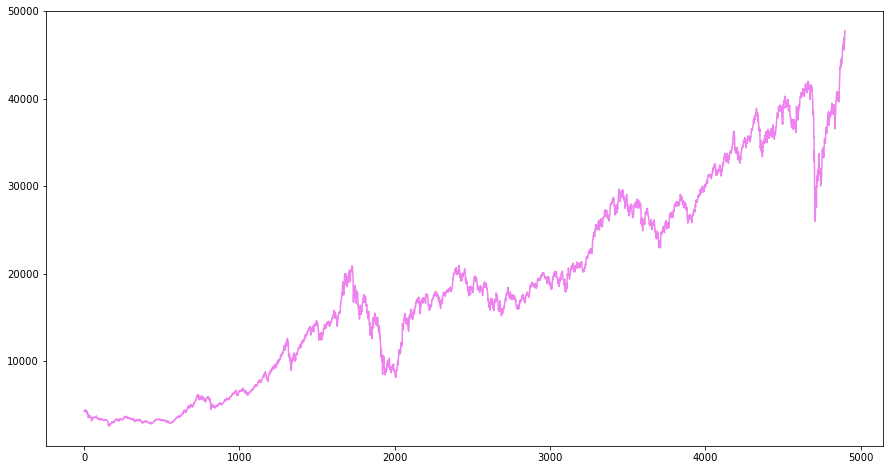

In [79]:
# Plot Close
plt.figure(figsize = (15,8))
stock_price['Close'].plot(color='violet')

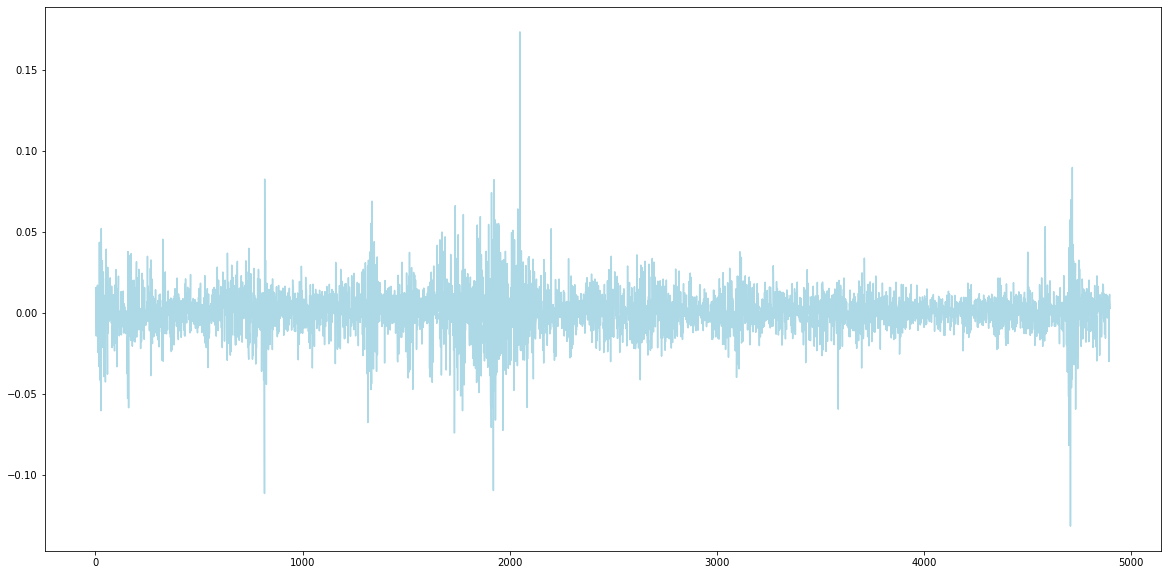

In [64]:
# Plot Returns
returns = stock_price['Close'] / stock_price['Close'].shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(color='lightblue')

Combining both the datasets together

In [13]:
data = pd.merge(stock_price, stock_news, left_on = 'Date', right_on = 'publish_date')

# Removing the common column
data.drop('publish_date',axis = 1, inplace = True)
data.dropna(axis = 1, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume,headline_text
0,2001-02-01,4303.129883,4355.390137,4230.169922,4286.109863,0,Army cordons off Anjar; says it's a mass grave...
1,2001-02-02,4280.959961,4373.399902,4280.959961,4352.259766,0,"Gujarat govt yet to get its act together,Pak r..."
2,2001-02-05,4337.520020,4397.189941,4337.520020,4370.470215,0,Official toll put at 16;435; Kutch's share 14;...
3,2001-02-06,4392.240234,4404.669922,4369.930176,4375.290039,0,"PMK withdraws support; but govt safe,Economic ..."
4,2001-02-07,4376.919922,4379.220215,4303.279785,4312.930176,0,"Tobacco firms ordered off the field,Consumer c..."


Sentiment Analysis

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
#Sentiment Analyzer object
sia = SentimentIntensityAnalyzer()

# Filling the compound column
data['Compound'] = data['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Filling the Positive column
data['Positive'] = data['headline_text'].apply(lambda x: sia.polarity_scores(x)['pos'])
# Filling the Neutral column
data['Neutral'] = data['headline_text'].apply(lambda x: sia.polarity_scores(x)['neu'])
# Filling the Negative column
data['Negative'] = data['headline_text'].apply(lambda x: sia.polarity_scores(x)['neg'])

data.head()

,Date,Open,High,Low,Close,Volume,headline_text,Compound,Positive,Neutral,Negative
0,2001-02-01,4303.129883,4355.390137,4230.169922,4286.109863,0,Army cordons off Anjar; says it's a mass grave...,-0.8302,0.066,0.829,0.105
1,2001-02-02,4280.959961,4373.399902,4280.959961,4352.259766,0,"Gujarat govt yet to get its act together,Pak r...",0.9693,0.218,0.714,0.068
2,2001-02-05,4337.520020,4397.189941,4337.520020,4370.470215,0,Official toll put at 16;435; Kutch's share 14;...,0.5267,0.142,0.740,0.118
3,2001-02-06,4392.240234,4404.669922,4369.930176,4375.290039,0,"PMK withdraws support; but govt safe,Economic ...",0.7650,0.104,0.832,0.064
4,2001-02-07,4376.919922,4379.220215,4303.279785,4312.930176,0,"Tobacco firms ordered off the field,Consumer c...",0.8388,0.127,0.813,0.060


In [18]:
# Removing the unwanted columns
data.drop(['Date', 'Open','Low', 'headline_text'], axis = 1, inplace = True)
data

,High,Close,Volume,Compound,Positive,Neutral,Negative
0,4355.390137,4286.109863,0,-0.8302,0.066,0.829,0.105
1,4373.399902,4352.259766,0,0.9693,0.218,0.714,0.068
2,4397.189941,4370.470215,0,0.5267,0.142,0.740,0.118
3,4404.669922,4375.290039,0,0.7650,0.104,0.832,0.064
4,4379.220215,4312.930176,0,0.8388,0.127,0.813,0.060
...,...,...,...,...,...,...,...
4874,46513.320312,46444.179688,10500,-0.9996,0.080,0.800,0.120
4875,47053.398438,46973.539062,13700,-0.9971,0.064,0.854,0.082
4876,47406.718750,47353.750000,9600,-0.9997,0.085,0.789,0.126
4877,47714.550781,47613.078125,12800,-0.9998,0.090,0.774,0.136


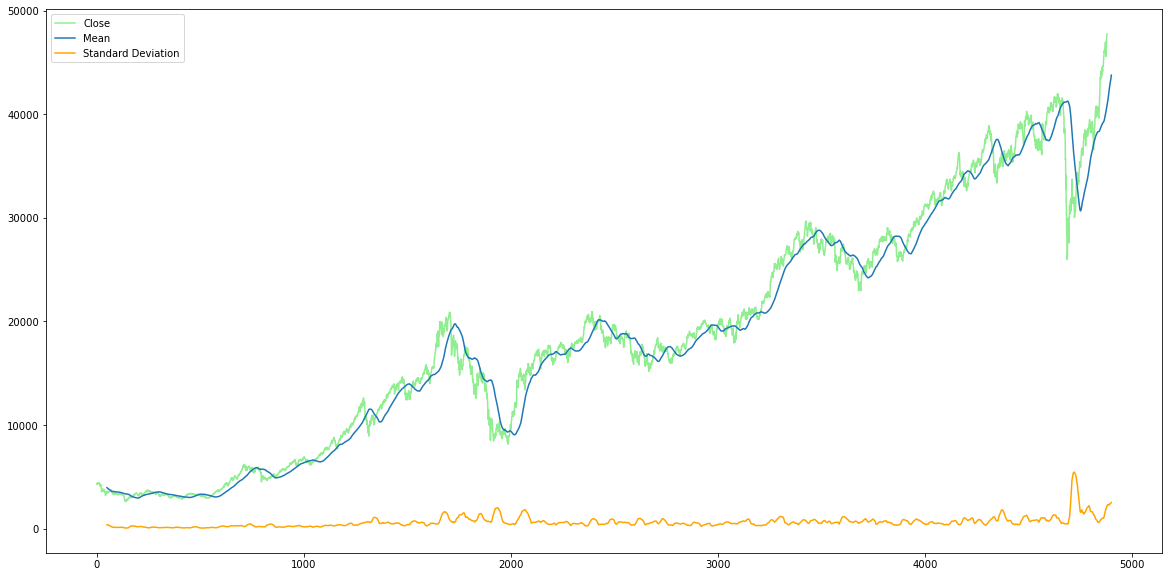

In [20]:
# Plotting rolling average
mean = stock_price['Close'].rolling(window = 50).mean()
std = stock_price['Close'].rolling(window = 50).std()

plt.figure(figsize=(20,10))
data['Close'].plot(color = 'lightgreen', label = 'Close')
mean.plot(label = 'Mean')
std.plot(color = 'orange', label = 'Standard Deviation')

plt.legend()

Splitting the data into train and test sets

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
print('Train set length: ',len(train_set))
print('test set length: ',len(test_set))

Train set length:  3903
test set length:  976


In [23]:
# For trainset
train_x = train_set.drop('Close', axis = 1)
train_y = train_set['Close']

# For testset
test_x = test_set.drop('Close', axis = 1)
test_y = test_set['Close']

Drifferent training models

In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model object
dtr = DecisionTreeRegressor()
# Training the training data
dtr.fit(train_x, train_y)

DecisionTreeRegressor()

In [67]:
# Predicting the values on testset
predicted = dtr.predict(test_x)
pd.DataFrame({'Actual value:':test_y, 'Predicted value:':predicted})[:5]

,Actual value:,Predicted value:
3720,25816.359375,25775.740234
724,5695.669922,5842.200195
297,3395.590088,3401.149902
2088,15009.769531,14875.519531
4154,34843.511719,34616.128906


In [68]:
# finding the error diffrence
print('Mean Squared Error: ', mean_squared_error(test_y, predicted))
print('Mean absolute error: ',mean_absolute_error(test_y, predicted))

Mean Squared Error:  40752.406502315745
Mean absolute error:  130.07969490426487


In [37]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model object
rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)

RandomForestRegressor()

In [69]:
# Predicting the values on testset
predicted = rfr.predict(test_x)
pd.DataFrame({'Actual value:':test_y, 'Predicted value:':predicted})[:5]

,Actual value:,Predicted value:
3720,25816.359375,25744.730957
724,5695.669922,5782.744404
297,3395.590088,3402.977273
2088,15009.769531,15052.714062
4154,34843.511719,34651.392422


In [70]:
# finding the error diffrence
print('Mean Squared Error: ', mean_squared_error(test_y, predicted))
print('Mean absolute error: ',mean_absolute_error(test_y, predicted))

Mean Squared Error:  25350.011904133775
Mean absolute error:  101.08159029100764


We can see that Random Forest Regression performs better

***

Thank You :)